# 1st delete NaN

In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [361]:
train_train = pd.read_csv('data/train.csv')
train_train= train_train.drop(columns=['Listening_Time_minutes'])
predict_predict = pd.read_csv('data/test.csv')

In [362]:
merge_data = pd.concat([train_train, predict_predict], axis=0, ignore_index=True)

In [363]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   id                           1000000 non-null  int64  
 1   Podcast_Name                 1000000 non-null  object 
 2   Episode_Title                1000000 non-null  object 
 3   Episode_Length_minutes       884171 non-null   float64
 4   Genre                        1000000 non-null  object 
 5   Host_Popularity_percentage   1000000 non-null  float64
 6   Publication_Day              1000000 non-null  object 
 7   Publication_Time             1000000 non-null  object 
 8   Guest_Popularity_percentage  805138 non-null   float64
 9   Number_of_Ads                999999 non-null   float64
 10  Episode_Sentiment            1000000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 83.9+ MB


In [364]:
merge_data.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral


In [365]:
merge_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000000.0,499999.500000,288675.278932,0.0,249999.75,499999.50,749999.25,999999.00
Episode_Length_minutes,884171.0,153.292021,83468.998471,0.0,35.74,63.87,94.08,78486264.00
Host_Popularity_percentage,1000000.0,59.824048,22.874903,1.3,39.37,60.02,79.49,119.46
Guest_Popularity_percentage,805138.0,52.225542,28.449679,0.0,28.37,53.54,76.59,119.91
Number_of_Ads,999999.0,1.350604,2.358272,0.0,0.00,1.00,2.00,2063.00


In [366]:
merge_data.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes         115829
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    194862
Number_of_Ads                       1
Episode_Sentiment                   0
dtype: int64

# Preprocessing of data

In [367]:

def create_features(df):
     # ジャンルごとにホストの人気度の平均を計算して，それを辞書型に変換
    #genre_to_weight = df.groupby('Genre')['Host_Popularity_percentage'].mean().to_dict()
    #df['Host_Popularity_by_Genre'] =  df['Host_Popularity_percentage'] * df['Genre'].map(genre_to_weight)
    """
    # 広告数とホスト人気の関係    
    ads_to_weight = df.groupby('Number_of_Ads')['Host_Popularity_percentage'].mean().to_dict()
    df['Host_Popularity_by_Ads'] =  df['Host_Popularity_percentage'] * df['Number_of_Ads'].map(ads_to_weight)
    
    # 視聴時間の長さ / 広告数
    ads_to_weight = df.groupby('Number_of_Ads')['Episode_Length_minutes'].mean().to_dict()
    df['Episode_Ads'] =  df['Episode_Length_minutes'] / df['Number_of_Ads'].map(ads_to_weight)

    
    """
    # ホストの人気 ＊ エピソードの長さ
    #df['Host_Popularity_by_Episode_Length'] = df['Host_Popularity_percentage'] * df['Episode_Length_minutes']

    # ホスト人気 * ゲスト人気
    #df['Host_Guest_Popularity'] = df['Host_Popularity_percentage'] * df['Guest_Popularity_percentage']
    
    return df

merge_data = create_features(merge_data)


In [368]:
#""" 異常値の処理
def clean_abnormal_values(df):
    
    # 100%以上はクリップ（`.loc` を使って変更）
    #df.loc[:, 'Host_Popularity_percentage'] = df['Host_Popularity_percentage'].clip(upper=100)
    #df.loc[:, 'Guest_Popularity_percentage'] = df['Guest_Popularity_percentage'].clip(upper=100)
    
    # Number_of_Ads が5以下のものだけを選択
    #df = df[df['Number_of_Ads'] <= 5]
    # Episode_Length_minutes が1000分未満だけを使う（16時間以上の回は除外）
    #df = df[df['Episode_Length_minutes'] < 1000]
    return df

# train と predict に適用
merge_data = clean_abnormal_values(merge_data)
#"""


In [369]:
#""" ロバストスケーリング
from sklearn.preprocessing import RobustScaler

def normalize_data(df):
    scaler = RobustScaler()
    # スケーリングを行うカラムを指定
    #columns_to_scale = ['Episode_Length_minutes', 'Number_of_Ads']
    columns_to_scale = ['Episode_Length_minutes','Number_of_Ads']
    
    # スケーリングを実行
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    
    return df

merge_data = normalize_data(merge_data)
#"""


In [370]:
merge_data.nunique()

id                             1000000
Podcast_Name                        48
Episode_Title                      100
Episode_Length_minutes           12450
Genre                               10
Host_Popularity_percentage        8046
Publication_Day                      7
Publication_Time                     4
Guest_Popularity_percentage      10034
Number_of_Ads                       14
Episode_Sentiment                    3
dtype: int64

In [371]:
# columns to drop 
def delete_columns(df):
    df.drop(columns=['id','Guest_Popularity_percentage'], inplace=True)
    return df

merge_data = delete_columns(merge_data)

In [372]:
merge_data.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Number_of_Ads,Episode_Sentiment
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,-0.5,Positive
1,Joke Junction,Episode 26,0.958690,Comedy,66.95,Saturday,Afternoon,0.5,Negative
2,Study Sessions,Episode 16,0.171923,Education,69.97,Tuesday,Evening,-0.5,Negative
3,Digital Digest,Episode 45,0.056565,Technology,57.22,Monday,Morning,0.5,Positive
4,Mind & Body,Episode 86,0.799451,Health,80.07,Monday,Afternoon,1.0,Neutral


# Data preparation before modeling

### Since there are few tpyes of object data,label encoding will be applied


In [373]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

def label_enocding(df,columns):
    le = LabelEncoder()

    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df

encoding_cols = ['Episode_Title','Podcast_Name','Genre','Publication_Day',
                 'Publication_Time','Episode_Sentiment']

merge_data = label_enocding(merge_data, encoding_cols)


In [374]:
merge_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Podcast_Name,1000000.0,23.509140,14.130881,0.000000,11.000000,23.00,37.000000,4.700000e+01
Episode_Title,1000000.0,50.266884,28.188012,0.000000,26.000000,51.00,74.000000,9.900000e+01
Episode_Length_minutes,884171.0,1.532774,1430.733604,-1.094789,-0.482173,0.00,0.517827,1.345324e+06
Genre,1000000.0,4.646925,2.962164,0.000000,2.000000,5.00,7.000000,9.000000e+00
Host_Popularity_percentage,1000000.0,59.824048,22.874903,1.300000,39.370000,60.02,79.490000,1.194600e+02
Publication_Day,1000000.0,2.962779,1.996461,0.000000,1.000000,3.00,5.000000,6.000000e+00
Publication_Time,1000000.0,1.522814,1.119155,0.000000,1.000000,1.00,3.000000,3.000000e+00
Number_of_Ads,999999.0,0.175302,1.179136,-0.500000,-0.500000,0.00,0.500000,1.031000e+03
Episode_Sentiment,1000000.0,0.997786,0.815496,0.000000,0.000000,1.00,2.000000,2.000000e+00


In [375]:
merge_data.isnull().sum()

Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes        115829
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Number_of_Ads                      1
Episode_Sentiment                  0
dtype: int64

In [376]:
def split_train_predict(df):
    train = df[df['Episode_Length_minutes'].notnull()]
    predict = df[df['Episode_Length_minutes'].isnull()]
    return train, predict

train, predict = split_train_predict(merge_data)

In [377]:
# Episode_Length_minutes が 1000分未満だけを使う（16時間以上の回は除外）
train = train[train['Episode_Length_minutes'] < 800]

In [378]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Podcast_Name,884170.0,23.518030,14.123912,0.000000,11.000000,23.00,37.000000,47.000000
Episode_Title,884170.0,50.334317,28.198834,0.000000,26.000000,51.00,75.000000,99.000000
Episode_Length_minutes,884170.0,0.011208,0.581407,-1.094789,-0.482173,0.00,0.517827,128.747515
Genre,884170.0,4.643320,2.961668,0.000000,2.000000,5.00,7.000000,9.000000
Host_Popularity_percentage,884170.0,59.838368,22.871942,1.300000,39.410000,60.05,79.510000,119.460000
Publication_Day,884170.0,2.958039,1.996968,0.000000,1.000000,3.00,5.000000,6.000000
Publication_Time,884170.0,1.524780,1.119224,0.000000,1.000000,2.00,3.000000,3.000000
Number_of_Ads,884169.0,0.176698,1.237698,-0.500000,-0.500000,0.00,0.500000,1031.000000
Episode_Sentiment,884170.0,0.995738,0.815203,0.000000,0.000000,1.00,2.000000,2.000000


In [379]:
# 行の数
print("train shape: ", train.shape)
print("train shape: ", predict.shape)

train shape:  (884170, 9)
train shape:  (115829, 9)


In [380]:
predict.isnull().sum()

Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes        115829
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [381]:
train.isnull().sum()

Podcast_Name                  0
Episode_Title                 0
Episode_Length_minutes        0
Genre                         0
Host_Popularity_percentage    0
Publication_Day               0
Publication_Time              0
Number_of_Ads                 1
Episode_Sentiment             0
dtype: int64

In [382]:
from sklearn.model_selection import train_test_split

def split_data(df, test_size=0.2, random_state=42):
    X = df.drop(columns=['Episode_Length_minutes'])
    y = df['Episode_Length_minutes']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(train)
predict_X = predict.copy()

# Model Construction

In [383]:
train.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Number_of_Ads,Episode_Sentiment
1,24,19,0.958690,1,66.95,2,0,0.5,0
2,40,8,0.171923,2,69.97,5,1,-0.5,0
3,10,40,0.056565,8,57.22,1,2,0.5,2
4,31,85,0.799451,3,80.07,1,0,1.0,1
5,14,11,-0.639870,3,48.96,2,0,1.0,2


In [384]:
import xgboost as xgb

# XGBoostモデルの構築
def build_xgboost_model(n_estimators=100,max_depth=5,learning_rate=0.1):
    """XGBoostモデルを構築する関数"""
    model = xgb.XGBRegressor(
        # 回帰タスクに適した損失関数（MSE）
        objective='reg:squarederror',
        # 決定木の数
        n_estimators=n_estimators,
        # 決定機の深さ
        max_depth=max_depth,
        # 学習率(小さいほど安定，収束が遅くなる)
        learning_rate=learning_rate,
        # 乱数シード
        random_state=42
    )
    return model

# モデルの構築
xgb_model = build_xgboost_model()

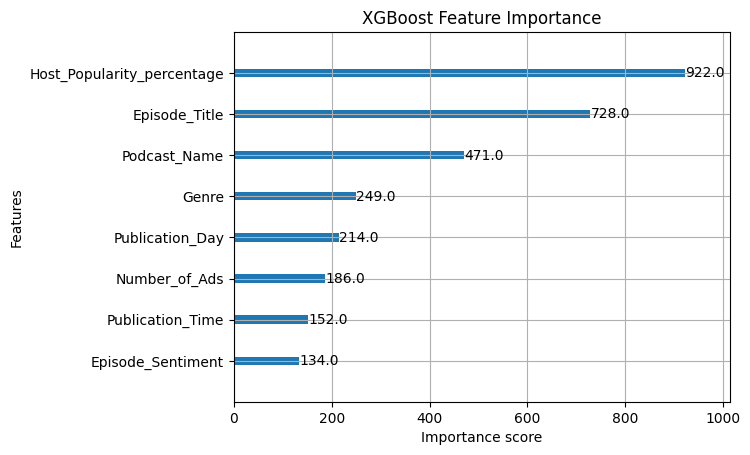

In [385]:
import matplotlib.pyplot as plt

# Train XGBoost model
xgb_model.fit(X_train, y_train) # XGBoostモデルの学習

# Feature importance
xgb.plot_importance(xgb_model) # 特徴量の重要度をプロット
plt.title('XGBoost Feature Importance') # タイトル
plt.show() # グラフの表示

# Model evalution

In [386]:
xgb_pred = xgb_model.predict(X_test)

In [387]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_metrics(y_true,y_pred):
    
    results = []

    def calulate_metrics(y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        return {
            'MSE': mse,
            'RMSE': mae,
            'R2': r2
        }
    results.append(calulate_metrics(y_true, y_pred))

    return pd.DataFrame(results)

results = evaluate_metrics(y_test, xgb_pred)
display(results)

,MSE,RMSE,R2
0,0.407594,0.485978,0.01325


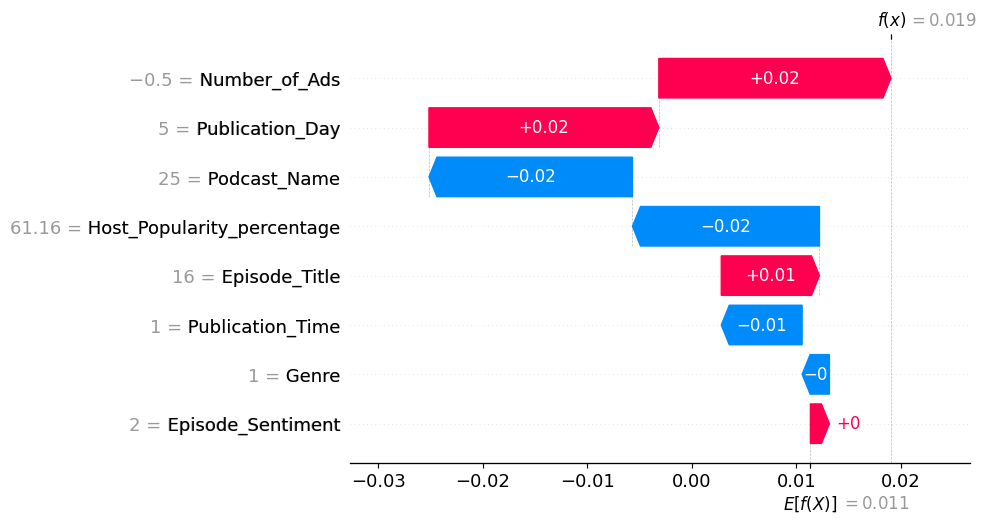

KeyboardInterrupt: 

In [388]:
import shap

def explain_model(model):
    # SHAP explainerを作成（TreeExplainerはXGBoostなどに最適）
    explainer = shap.Explainer(model)

    # SHAP値を計算（X_testに対して）
    shap_values = explainer(X_test)

    # 可視化（例：1件目の予測理由）
    shap.plots.waterfall(shap_values[0])

    # 全体の特徴量の影響（要約プロット）
    shap.plots.beeswarm(shap_values)

explain_model(xgb_model)


# Optuna

In [ ]:
import optuna
def optimize_xgboost(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500), # 決定木の数
        'max_depth': trial.suggest_int('max_depth', 3, 10), # 決定木の深さ
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3), # 学習率
        'subsample': trial.suggest_float('subsample', 0.6, 1.0), # サブサンプル
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0), # 列のサブサンプル
        'gamma': trial.suggest_float('gamma', 0, 1), # 葉ノードを分割するために必要な最小損失削減
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10), # 葉ノードの重みの最小合計
        'objective': 'reg:squarederror', # 回帰タスクに適した損失関数
        'random_state': 42                
    }

    model = xgb.XGBRegressor(**params)
    model = model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    return mse

study = optuna.create_study(direction='minimize')
study.optimize(optimize_xgboost, n_trials=10)

# dislay best results
print('Best trial:')
trial = study.best_trial # 最良のトライアル
print(f"  MSE: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Predict
optimized_xgb = xgb.XGBRegressor(**trial.params, random_state=42)
optimized_xgb.fit(X_train, y_train)

[I 2025-04-18 15:46:42,367] A new study created in memory with name: no-name-5997e727-e811-49c6-ae7a-8e927b6939a8
[I 2025-04-18 15:46:44,637] Trial 0 finished with value: 311070.07292522455 and parameters: {'n_estimators': 303, 'max_depth': 5, 'learning_rate': 0.2721850347360387, 'subsample': 0.7807906753814761, 'colsample_bytree': 0.798310694601527, 'gamma': 0.9310054157731927, 'min_child_weight': 9}. Best is trial 0 with value: 311070.07292522455.
[I 2025-04-18 15:46:45,258] Trial 1 finished with value: 13661.97530610641 and parameters: {'n_estimators': 117, 'max_depth': 3, 'learning_rate': 0.2416058100832135, 'subsample': 0.7799089616538402, 'colsample_bytree': 0.9679150898139338, 'gamma': 0.6587138347506973, 'min_child_weight': 8}. Best is trial 1 with value: 13661.97530610641.
[I 2025-04-18 15:46:45,651] Trial 2 finished with value: 41603.05462315958 and parameters: {'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.2889069132988642, 'subsample': 0.7319059942722785, 'colsampl

KeyboardInterrupt: 

In [ ]:
optimized_pred = optimized_xgb.predict(X_test)
optimized_metrics = evaluate_metrics(y_test,  optimized_pred) # 評価
display(optimized_metrics)

,MSE,RMSE,R2
0,0.402193,0.480953,0.026327


In [ ]:
# 保存（バイナリ形式）
#optimized_xgb.save_model("model/xgboost/xgb_model.json")  # .json でも .model でもOK

"""
import xgboost as xgb

# モデルの読み込み
loaded_model = xgb.XGBRegressor()
loaded_model.load_model("xgb_model.json")
"""

'\nimport xgboost as xgb\n\n# モデルの読み込み\nloaded_model = xgb.XGBRegressor()\nloaded_model.load_model("xgb_model.json")\n'

In [ ]:
predixt_y = optimized_xgb.predict(predict_X)

predict_df = pd.DataFrame(predixt_y , columns=['Listening_Time_minutes'])

submission = pd.concat([passenger_id, predict_df], axis=1)

display(submission.head())

ValueError: feature_names mismatch: ['Podcast_Name', 'Episode_Title', 'Genre', 'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment', 'Host_Guest_Popularity'] ['Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre', 'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment', 'Host_Guest_Popularity']
training data did not have the following fields: Episode_Length_minutes

In [ ]:
#submission.to_csv('submit/xgb_submit/submission4.csv', index=False)